In [89]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import csv
import time
from scipy.stats import linregress
import scipy.stats as stats


In [90]:
## Output File (CSV)
data_file_day = "archive/day.csv"
data_file_hour="archive/hour.csv"
#Creating DataFrame
Bike_Share_Day=pd.read_csv(data_file_day)
Bike_Share_Hour=pd.read_csv(data_file_hour)
#print(Bike_Share_Day.head())
print(Bike_Share_Hour.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


# Time of day vs Bike Rentals

In [91]:
Bike_Hour_Count=Bike_Share_Hour.groupby(Bike_Share_Hour['hr']).count()['cnt']
Bike_Hour_Count_df=pd.DataFrame({'Bikes Count':Bike_Hour_Count})
Bike_Hour_Count_df

,Bikes Count
hr,
0,726
1,724
2,715
3,697
4,697
5,717
6,725
7,727
8,727


# Weather patterns vs Bike Rentals

In [113]:
bins=[0,1,2,3]
group=['Clear','Cloudy','Rainy']
Bike_Share_Day['Weather']=pd.cut(Bike_Share_Day['weathersit'],bins,labels=group,include_lowest=True)
Bike_Share_Day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Weather
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Cloudy
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Cloudy
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Clear
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Clear
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Clear


In [114]:
Bike_Day_Count=Bike_Share_Day.groupby(Bike_Share_Day['Weather']).sum()['cnt']

Bike_Day_Count_df=pd.DataFrame({'Rental Count via weather type':Bike_Day_Count})
Bike_Day_Count_df

,Rental Count via weather type
Weather,
Clear,2257952
Cloudy,996858
Rainy,37869


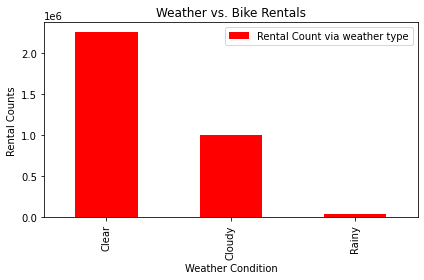

In [115]:
Bike_Day_Count_df.plot(kind="bar", facecolor="red")

plt.title ("Weather vs. Bike Rentals")
plt.ylabel("Rental Counts")
plt.xlabel("Weather Condition")
plt.tight_layout()

plt.show()



In [116]:
Bikes_df=Bike_Share_Day.groupby(Bike_Share_Day['Weather']).sum()['cnt']
Bikes_df=pd.DataFrame({'Rental Count via weather type':Bikes_df})
Bikes_df=Bikes_df.reset_index()
Bikes_df

,Weather,Rental Count via weather type
0,Clear,2257952
1,Cloudy,996858
2,Rainy,37869


In [117]:
observed = pd.Series([2257952,996858,37869], index=["Clear", "Cloudy", "Rainy"])

df = pd.DataFrame([observed]).T

df[2] = 1097560

df.columns = ["observed", "expected"]

df


,observed,expected
Clear,2257952,1097560
Cloudy,996858,1097560
Rainy,37869,1097560


In [118]:
 # The degree of freedom is 3-1 = 2
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 2)


In [111]:
# The critical value
critical_value

5.991464547107979

In [112]:
 # Run the chi square test with stats.chisquare()
stats.chisquare(df['observed'], df['expected'])

Power_divergenceResult(statistic=2259189.0210548854, pvalue=0.0)

In [ ]:
#Since the chi-square value of 2,259,189 at a confidence level of 95% 
#exceeds the critical value of 5.9, 
#we conclude that the differences seen in the number 
#of rentals per weather type are statistically significant.


# Seasons vs Bike Rentals

# Weekday versus Weekend  Bike Rentals

# Holiday vs Bike Rentals